In [22]:
import os, json, csv
import networkx as nx
import networkx.algorithms.isomorphism as iso
from networkx.algorithms.isomorphism import faster_could_be_isomorphic as fcbi
import matplotlib.pyplot as plt

In [2]:
data = []
with open('data_graphs_adj.tsv', 'r') as rf:
    reader = csv.reader(rf, delimiter='\t')
    for row in reader:
        data.append(row)

In [4]:
data[:5]

[['ID', 'GRAPH'],
 ['BGC0001448.2',
  'Asp,Asp,Val,Dbu,Asp,X0,Asp,Gly,Pro,Val,Lys;1,2;3,4;5,6;4,5;7,8;8,1;9,10;10,7;2,11;11,3;4,9'],
 ['BGC0001448.1',
  'Lys,Val,Asp,Asp,Dbu,Gly,Pro,Val,Asp,iC10:2(2.t4),Asp;1,2;3,4;2,5;6,3;7,8;9,10;5,7;8,11;4,1;11,6;5,9'],
 ['BGC0000298.3', 'X0,X1,Ile,X2;1,2;3,4;2,3'],
 ['BGC0000298.2', 'X0,X1,Ile,4OH-D-Ph-Lac;1,2;2,3;3,4']]

In [26]:
def make_graph(s):
    if ';' not in s:
        g = nx.Graph()
        g.add_node('1')
        nx.set_node_attributes(g, {'1':{'label':s}})
        return g
    [acids, edges] = s.split(';', maxsplit=1)
    d = {str(i+1): {'label': acid} for i, acid in enumerate(acids.split(','))}
    graph =nx.Graph()
    for edge in edges.split(';'):
        [n1, n2] = edge.split(',')
        graph.add_edge(n1, n2)
    nx.set_node_attributes(graph, d)
    
    return graph#, acids.split(',')
    
    
def num_nodes_eq(s1, s2):
    '''Проверяет что длина двух соединений равна'''
    return len(s1.split(';')[0].split(',')) == len(s2.split(';')[0].split(','))

def is_direct_acyclic(s):
    '''Проверяет что граф прямой и ацикличный'''
    return nx.is_directed_acyclic_graph(make_graph(s))

def are_isomorphic(s1, s2):
    '''Проверяет изоморфизм двух графов'''
    if 'X' in s1 or 'X' in s2:
        return False
    return nx.is_isomorphic(make_graph(s1), make_graph(s2))

def are_equal(s1, s2):
    '''Проверяет точное равенство графов с учетом мономеров'''
    if not fcbi(make_graph(s1), make_graph(s2)):
        return False
    if 'X' in s1 or 'X' in s2:
        return False
    nm = iso.categorical_node_match('label', '')
    return nx.is_isomorphic(make_graph(s1), make_graph(s2), node_match=nm)

def draw_graph(s):
    graph = make_graph(s)
    nx.draw_circular(graph,
         node_color='red',
         node_size=1000,
         with_labels=True,
        labels = {str(i+1):graph.nodes[str(i+1)]['label'] for i in range(len(graph.nodes))})



In [6]:
s1 = 'X0,Ile,X1,X2;1,2;3,1;2,4'
g = make_graph(s1)
g.nodes['1']
for node in g.nodes:
    print(node)

1
2
3
4


In [9]:
i, j = 1, 2
data[i],data[j]

(['BGC0001448.2',
  'Asp,Asp,Val,Dbu,Asp,X0,Asp,Gly,Pro,Val,Lys;1,2;3,4;5,6;4,5;7,8;8,1;9,10;10,7;2,11;11,3;4,9'],
 ['BGC0001448.1',
  'Lys,Val,Asp,Asp,Dbu,Gly,Pro,Val,Asp,iC10:2(2.t4),Asp;1,2;3,4;2,5;6,3;7,8;9,10;5,7;8,11;4,1;11,6;5,9'])

In [16]:
import matplotlib.pyplot as plt

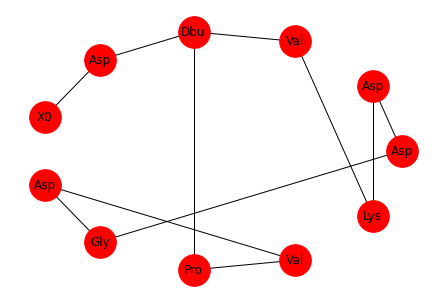

In [31]:

draw_graph(data[1][1])

#draw_graph(data[2][1])


In [12]:
for i in range(1, len(graphs)):
    for j in range(i+1, len(graphs)):
        if not are_isomorphic(data[i][1],data[j][1]):
            #print(i, j)

SyntaxError: unexpected EOF while parsing (3747053168.py, line 4)

In [280]:
for i in range(1, len(graphs)):
    for j in range(i+1, len(graphs)):
        if are_equal(data[i][1],data[j][1]):
            print(i, j)

77 284
78 842
301 707
301 800
439 441
528 905
632 703
707 800
722 723
838 1480
925 931
1160 1161
1163 1212
1345 1350
1345 1356
1350 1356
1354 1355
1354 1358
1355 1358
1431 1613
1431 1614
1431 1616
1513 1514
1613 1614
1613 1616
1614 1616
1699 1700


In [242]:
s1 = 'X0,Ile,X1,X2;1,2;3,1;2,4'
s2 = 'Ile,X0,X1,X2;3,2;1,2;4,1'
s3 = 'X3,Ile,X1,X2;1,2;3,1;2,4'
are_equal(s1,s2), are_equal(s1, s3), are_isomorphic(s1, s3)

(True, False, True)

In [218]:
s1 = 'a,b,c,d;1,4;1,2;1,3'
g1 = make_graph(s1)
s2 = 'a,b,c,d;2,1;4,1;1,3'
g2 = make_graph(s2)
#are_isomorphic(g1, g2)
nm = iso.categorical_node_match('label', '')
nx.is_isomorphic(g1, g2, node_match=nm)

True

In [80]:
s = graphs[19][1]
g = nx.Graph()
g.add_node(1)
№draw_graph(s)

SyntaxError: invalid character in identifier (97589070.py, line 4)

In [106]:
graphs[18][1]

'X0,X1,X2;1,2;3,2;1,3'

In [40]:
alphabet = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'] 
masses = [71, 103, 115, 129, 147, 57, 137, 113, 128, 113, 131, 114, 97, 128, 156, 87, 101, 99, 186, 163]
d = {alphabet[i]:masses[i] for i in range(len(alphabet))}
spectrum = set({0})
s = input()
def func(s):
    global d
    res = 0
    for i in s:
        res += d[i]
    return res
for i in range(len(s)):
    spectrum.add(func(s[:i+1]))
    spectrum.add(func(s[-i+1:]))
print(*sorted(list(spectrum)))

 REDCA


0 71 156 174 285 289 400 418 503 574


In [42]:
s1 = '1,2,3;1,3'

[0, 71, 156, 174, 285, 289, 400, 418, 503, 574]